In [12]:
import tensorflow as tf
from glob import glob
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Dataset
## Get

In [4]:
IMG_TARGET_SIZE = (224, 224)
DATA_FOLDER = "data/Image_Classification/dataset_25061716"

dataset = []
labels = []
labels_name = []

classes = glob(DATA_FOLDER + "/*")

# get all classes
for class_idx, class_folder in tqdm(list(enumerate(classes))):
    labels_name.append(class_folder.split("/")[-1])
    
    # get all images in class folder
    for image_file in glob(class_folder + "/*.jpg"):
        image = cv2.imread(image_file)
        image = cv2.resize(image, IMG_TARGET_SIZE)
        
        dataset.append(image)
        
        # hot encoding labels
        label = np.zeros(len(classes))
        label[class_idx] = 1
        labels.append(label)

dataset = np.array(dataset)
labels = np.array(labels)

print(f"data shape: {dataset.shape}, labels shape: {labels.shape}")

100%|██████████| 20/20 [00:33<00:00,  1.65s/it]

data shape: (3248, 224, 224, 3), labels shape: (3248, 20)


## Split

In [5]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.3, random_state=25061716)
test_dataset, val_dataset, test_labels, val_labels = train_test_split(test_dataset, test_labels, test_size=0.3, random_state=25061716)

print(f"train data shape: {train_dataset.shape}, train labels shape: {train_labels.shape}")
print(f"test data shape: {test_dataset.shape}, test labels shape: {test_labels.shape}")
print(f"val data shape: {val_dataset.shape}, val labels shape: {val_labels.shape}")

train data shape: (2273, 224, 224, 3), train labels shape: (2273, 20)
test data shape: (682, 224, 224, 3), test labels shape: (682, 20)
val data shape: (293, 224, 224, 3), val labels shape: (293, 20)


In [6]:
from tensorflow.keras.applications import resnet

model = resnet.ResNet50(include_top=True, weights=None, input_shape=(IMG_TARGET_SIZE[0], IMG_TARGET_SIZE[1], 3), classes=len(classes))
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, train_labels, validation_data=(val_dataset, val_labels), epochs=100, batch_size=32)

Epoch 1/100
72/72 [==============================] - 21s 296ms/step - loss: 1.4597 - accuracy: 0.5363 - val_loss: 7.3290 - val_accuracy: 0.2014
Epoch 2/100
72/72 [==============================] - 21s 297ms/step - loss: 1.2238 - accuracy: 0.5979 - val_loss: 4.7187 - val_accuracy: 0.3413
Epoch 3/100
72/72 [==============================] - 21s 298ms/step - loss: 1.2541 - accuracy: 0.6018 - val_loss: 2.1510 - val_accuracy: 0.4334
Epoch 4/100
72/72 [==============================] - 21s 298ms/step - loss: 1.2389 - accuracy: 0.6098 - val_loss: 4.4795 - val_accuracy: 0.2765
Epoch 5/100
72/72 [==============================] - 22s 299ms/step - loss: 1.2721 - accuracy: 0.5847 - val_loss: 2.7908 - val_accuracy: 0.3754
Epoch 6/100
72/72 [==============================] - 22s 299ms/step - loss: 1.1305 - accuracy: 0.6313 - val_loss: 3.8544 - val_accuracy: 0.3754
Epoch 7/100
72/72 [==============================] - 22s 299ms/step - loss: 0.9394 - accuracy: 0.6890 - val_loss: 2.7389 - val_accuracy:

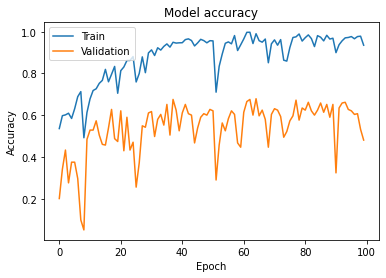

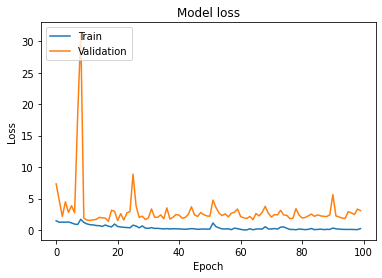

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
model.save("model.h5")

/usr/local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [31]:
def compute_accuracies(model):
    true_train_labels = np.argmax(train_labels, axis=1)
    predicted_train_labels = model.predict(train_dataset).argmax(axis=1)
    train_accuracy = accuracy_score(true_train_labels, predicted_train_labels)
    
    true_test_labels = np.argmax(test_labels, axis=1)
    predicted_test_labels = model.predict(test_dataset).argmax(axis=1)
    test_accuracy = accuracy_score(true_test_labels, predicted_test_labels)
    
    true_val_labels = np.argmax(val_labels, axis=1)
    predicted_val_labels = model.predict(val_dataset).argmax(axis=1)
    val_accuracy = accuracy_score(true_val_labels, predicted_val_labels)
    
    return train_accuracy, test_accuracy, val_accuracy

In [32]:
train_accuracy, test_accuracy, val_accuracy = compute_accuracies(model)

print(f"{train_accuracy = }, {test_accuracy = }, {val_accuracy = }")

train_accuracy = 0.7668279806423229, test_accuracy = 0.5175953079178885, val_accuracy = 0.4812286689419795


In [1]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


NameError: name 'history' is not defined

In [2]:
model.save("model.h5")

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

predicted_labels = model.predict(test_dataset)
true_labels = np.argmax(test_labels, axis=1)

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")
